# Examples for pyPlumbing

PyPlumbing is the new package which substitutes pySeifert. PyPlumbing offers numerous advantages with respect to pySeifert:
1. pyPlumbing is quicker than pySeifert
2. pyPlumbing is able to handle any weakly negative plumbing manifold

This note covers a few examples of pyPlumbing usage

In [24]:
from pyPlumbing import Plumbing
import itertools
import time

## Definitions
Plumbings can be defined in multiple ways depending on the manifold.
The most generic is to define a Plumbing through a plumbing graph:

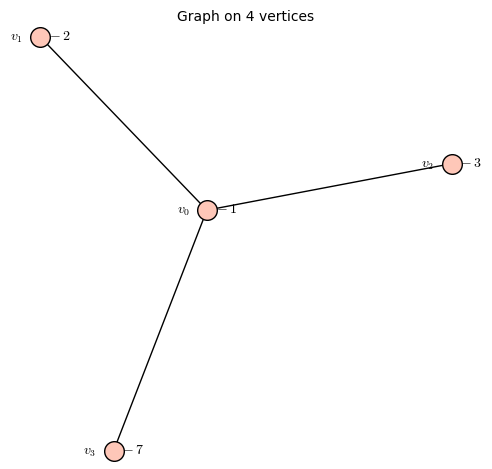

In [25]:
P = Plumbing({0: -1, 1: -2, 2: -3, 3: -7}, [(0, 1), (0, 2), (0, 3)]);P.graph

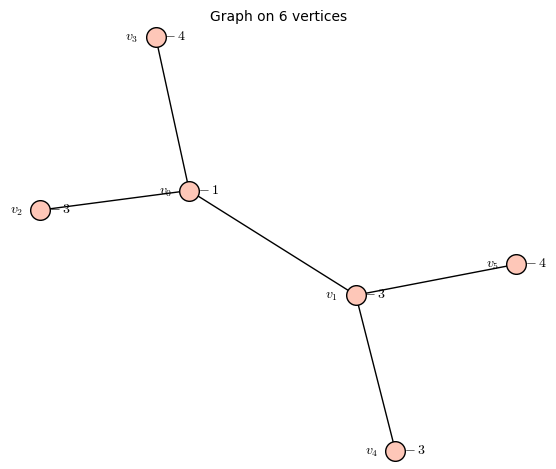

In [26]:
P2 = Plumbing({0: -1, 1: -3, 2: -3, 3: -4, 4: -3, 5: -4}, [(0,1),(0,2),(0,3),(1,4),(1,5)]); P2.graph

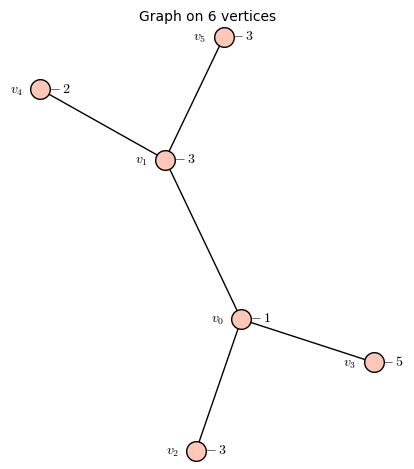

In [27]:
P3 = Plumbing({0: 1, 1:3, 2:3, 3:5, 4:2, 5:3}, [(0,1),(0,2),(0,3),(1,4),(1,5)]).invert_orientation(); P3.graph

Seifert manifolds may also be defined through their Seifert data

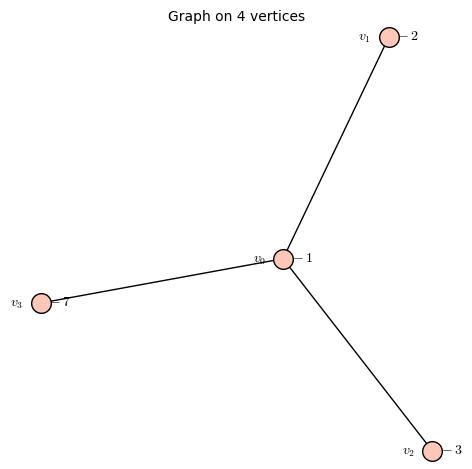

In [28]:
P = Plumbing.from_Seifert_data([-1,1/2,1/3,1/7]);P.graph

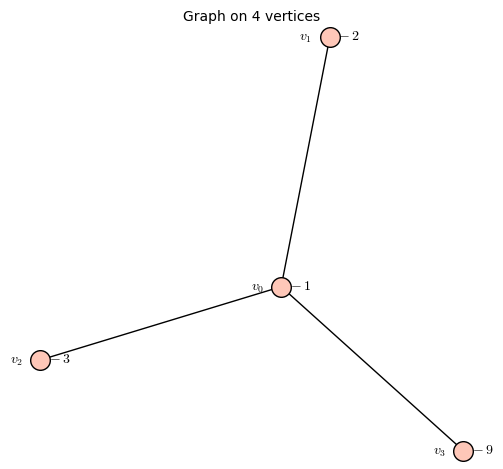

In [29]:
P4 = Plumbing.from_Seifert_data([-1,1/2,1/3,1/9]);P4.graph

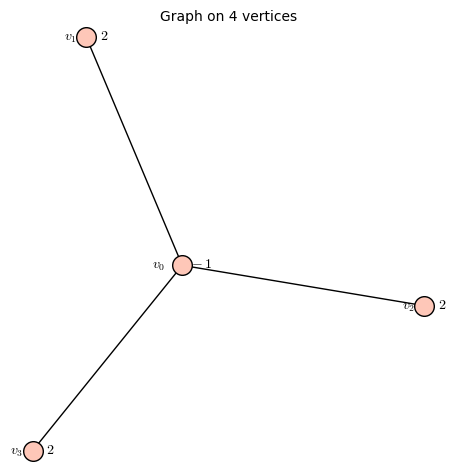

In [30]:
P5 = Plumbing.from_Seifert_data([-1,-1/2,-1/2,-1/2]);P5.graph

Spin c structures are computed in a similar way as pySeifert

In [31]:
P.spin_c(["A",1]),P.spin_c(["A",2]),P.spin_c(["A",5]),P.spin_c(["D",5])

([
[ 1]
[-1]
[-1]
[-1]
],
 [
[ 1  1]
[-1 -1]
[-1 -1]
[-1 -1]
],
 [
[ 1  1  1  1  1]
[-1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1]
],
 [
[ 1  1  1  1  1]
[-1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1]
])

In [32]:
P4.spin_c(["A",1]),P4.spin_c(["A",2]),P4.spin_c(["A",5]),P4.spin_c(["D",5])

([
[ 1]  [ 3]
[-1]  [-1]
[-1]  [-5]
[-1], [-7]
],
 [
[ 1  1]  [ 3  0]
[-1 -1]  [-1 -1]
[-1 -1]  [-5  1]
[-1 -1], [-7  2]
],
 [
[ 1  1  1  1  1]  [ 3  0  1  1  1]
[-1 -1 -1 -1 -1]  [-1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1]  [-5  1 -1 -1 -1]
[-1 -1 -1 -1 -1], [-7  2 -1 -1 -1]
],
 [
[ 1  1  1  1  1]  [ 3  0  1  1  1]
[-1 -1 -1 -1 -1]  [-1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1]  [-5  1 -1 -1 -1]
[-1 -1 -1 -1 -1], [-7  2 -1 -1 -1]
])

And with these the $\hat{Z}$ can be computed (the higher the last number the more q-powers are computed. It's still unclear to what maximum q-power the expansion is correct though. The best thing to do in that case so far is to compute the next number and see where they start differing.)

There are two functions to compute zhat. Plumbing.zhat and Plumbing.zhat_np. The first ensures convergence of all q-powers outputted, the latter does not (but it's quicker).

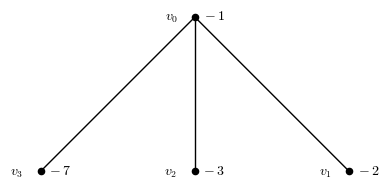

In [33]:
P.display()

In [34]:
import time
st = time.time()
zh = P.zhat(["A",1],P.spin_c(["A",1])[0],10000,n_powers_start = 10, method = "python", info = False) 
end = time.time()
print(end-st)
print(zh)

4.813382625579834
q^(1/2)(-4 + 4q^(1) + 4q^(5) - 4q^(10) + 4q^(11) - 4q^(18) - 4q^(30) + 4q^(41) - 4q^(43) + 4q^(56) + O(q^76))


In [35]:
st = time.time()
zh = P.zhat(["A",1],P.spin_c(["A",1])[0],10000,n_powers_start = 10, method = "vectorized") 
end = time.time()
print(end-st)
print(zh)

3.89443302154541
q^(1/2)(-4 + 4q^(1) + 4q^(5) - 4q^(10) + 4q^(11) - 4q^(18) - 4q^(30) + 4q^(41) - 4q^(43) + 4q^(56) + O(q^76))


In [36]:
st = time.time()
zh = P.zhat(["A",1],P.spin_c(["A",1])[0],10000, n_powers_start = 10, method = "cython") 
end = time.time()
print(end-st)
print(zh)

4.041343927383423
q^(1/2)(-4 + 4q^(1) + 4q^(5) - 4q^(10) + 4q^(11) - 4q^(18) - 4q^(30) + 4q^(41) - 4q^(43) + 4q^(56) + O(q^76))


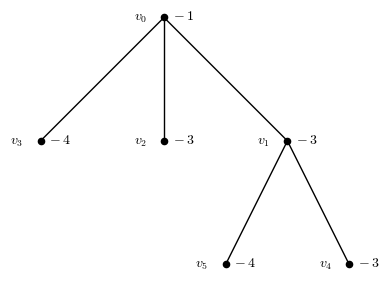

In [37]:
P2.display()

In [38]:
# P2 is a non-spherical manifold with 2 high valency vertices
st = time.time()
zh = P2.zhat(["A",1],P2.spin_c(["A",1])[0],100,n_powers_start = 16, method = "python") 
end = time.time()
print(end-st)
print(zh)

30.674920320510864
q^(1/2)(8 + 8q^(1) - 8q^(2) - 8q^(4) - 16q^(5) + 8q^(6) - 8q^(7) - 8q^(8) + 8q^(10) + 8q^(11) + O(q^12))


In [39]:
st = time.time()
zh = P2.zhat(["A",1],P2.spin_c(["A",1])[0],100,n_powers_start = 16, method = "vectorized") 
end = time.time()
print(end-st)
print(zh)

6.390181064605713
q^(1/2)(8 + 8q^(1) - 8q^(2) - 8q^(4) - 16q^(5) + 8q^(6) - 8q^(7) - 8q^(8) + 8q^(10) + 8q^(11) + O(q^12))


In [40]:
st = time.time()
zh = P2.zhat(["A",1],P2.spin_c(["A",1])[0],100,n_powers_start = 16, method = "cython") 
end = time.time()
print(end-st)
print(zh)

6.655447483062744
q^(1/2)(8 + 8q^(1) - 8q^(2) - 8q^(4) - 16q^(5) + 8q^(6) - 8q^(7) - 8q^(8) + 8q^(10) + 8q^(11) + O(q^12))


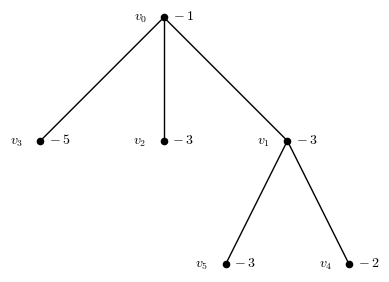

In [41]:
P3.display()

In [42]:
# P3 is a non-spherical manifold with 2 high valency vertices
st = time.time()
zh = P3.zhat(["A",1],P3.spin_c(["A",1])[0],100,n_powers_start = 16, method = "python") 
end = time.time()
print(end-st)
print(zh)

32.22810506820679
q^(1/2)(12 + 12q^(1) - 4q^(2) + 8q^(3) + 4q^(4) - 8q^(6) - 16q^(7) + 8q^(8) - 8q^(9) - 8q^(10) + O(q^11))


In [43]:
st = time.time()
zh = P3.zhat(["A",1],P3.spin_c(["A",1])[0],100,n_powers_start = 16, method = "vectorized") 
end = time.time()
print(end-st)
print(zh)

6.656383991241455
q^(1/2)(12 + 12q^(1) - 4q^(2) + 8q^(3) + 4q^(4) - 8q^(6) - 16q^(7) + 8q^(8) - 8q^(9) - 8q^(10) + O(q^11))


In [44]:
st = time.time()
zh = P3.zhat(["A",1],P3.spin_c(["A",1])[0],100,n_powers_start = 16, method = "cython") 
end = time.time()
print(end-st)
print(zh)

6.631842851638794
q^(1/2)(12 + 12q^(1) - 4q^(2) + 8q^(3) + 4q^(4) - 8q^(6) - 16q^(7) + 8q^(8) - 8q^(9) - 8q^(10) + O(q^11))


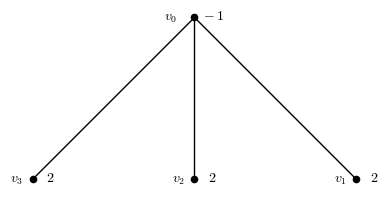

In [45]:
P5.display()

In [46]:
st = time.time()
zh = P5.zhat(["A",1],P5.spin_c(["A",1])[0],1000,n_powers_start = 50, method = "python") 
end = time.time()
print(end-st)
print(zh)

2.152961254119873
q^(1/2)(4 - 4q^(5) + 4q^(15) - 4q^(30) + 4q^(50) - 4q^(75) + 4q^(105) - 4q^(140) + 4q^(180) - 4q^(225) + O(q^275))


In [47]:
st = time.time()
zh = P5.zhat(["A",1],P5.spin_c(["A",1])[0],1000,n_powers_start = 50, method = "vectorized") 
end = time.time()
print(end-st)
print(zh)

2.147099733352661
q^(1/2)(4 - 4q^(5) + 4q^(15) - 4q^(30) + 4q^(50) - 4q^(75) + 4q^(105) - 4q^(140) + 4q^(180) - 4q^(225) + O(q^275))


In [48]:
for spin_c in P5.spin_c(["A",1]):
    print(spin_c.T)
    st = time.time()
    zh = P5.zhat(["A",1],spin_c,1000,n_powers_start = 50, method = "cython") 
    end = time.time()
    print(end-st)
    print(zh)

[ 1 -1 -1 -1]
1.9700257778167725
q^(1/2)(4 - 4q^(5) + 4q^(15) - 4q^(30) + 4q^(50) - 4q^(75) + 4q^(105) - 4q^(140) + 4q^(180) - 4q^(225) + O(q^275))
[1 1 1 1]
4.2024829387664795
q^(-1/10)(-2 + 2q^(2) - 2q^(3) - 2q^(9) + 2q^(11) + 2q^(21) - 2q^(24) - 2q^(38) + 2q^(42) + 2q^(60) + O(q^65))
[ 3 -1  1  1]
4.91034722328186
q^(1/2)(4 - 4q^(5) + 4q^(15) - 4q^(30) + 4q^(50) - 4q^(75) + 4q^(105) - 4q^(140) + 4q^(180) - 4q^(225) + O(q^275))
[ 3  1 -1  1]
6.435667514801025
q^(1/2)(4 - 4q^(5) + 4q^(15) - 4q^(30) + 4q^(50) - 4q^(75) + 4q^(105) - 4q^(140) + 4q^(180) - 4q^(225) + O(q^275))
[ 3  1  1 -1]
7.052820682525635
q^(1/2)(4 - 4q^(5) + 4q^(15) - 4q^(30) + 4q^(50) - 4q^(75) + 4q^(105) - 4q^(140) + 4q^(180) - 4q^(225) + O(q^275))
[3 1 1 1]
7.008059978485107
q^(1/10)(-2 - 2q^(1) + 2q^(4) + 2q^(7) - 2q^(13) - 2q^(18) + 2q^(27) + 2q^(34) - 2q^(46) - 2q^(55) + O(q^70))
[3 1 3 3]
2.881277084350586
q^(-1/10)(2 + 2q^(2) - 2q^(3) - 2q^(9) + 2q^(11) + 2q^(21) - 2q^(24) - 2q^(38) + 2q^(42) + 2q^(60) + O(q^6

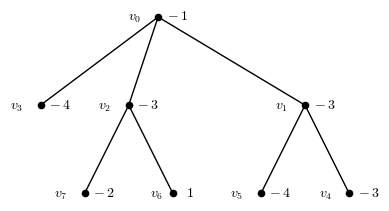

In [49]:
# This one has three high valency vertices
P6 = Plumbing({0: -1, 1: -3, 2: -3, 3: -4, 4: -3, 5: -4, 6: 1, 7: -2}, [(0,1),(0,2),(0,3),(1,4),(1,5),(2,6),(2,7)]);P6.display()

In [50]:
st = time.time()
zh = P6.zhat(["A",1],P6.spin_c(["A",1])[0],50,n_powers_start = 15, method = "cython") 
end = time.time()
print(end-st)
print(zh)

78.53721833229065
-4*q^(12044499384671/198922245628) + 4*q^(11646654893415/198922245628) + 4*q^(10850965910903/198922245628) + 4*q^(9856354682763/198922245628) - 4*q^(9657432437135/198922245628) + 4*q^(8264976717739/198922245628) - 4*q^(7071443243971/198922245628) + 4*q^(6872520998343/198922245628) - 4*q^(6186131847747/196081488796) + 4*q^(5990050358951/196081488796) - 4*q^(5401805892563/196081488796) - 4*q^(4813561426175/196081488796) - 4*q^(4617479937379/196081488796) - 4*q^(4225316959787/196081488796) + 4*q^(4029235470991/196081488796) - 4*q^(3070754344811/197491651980) - 4*q^(1885804432931/197491651980) + 4*q^(1688312780951/197491651980) + 4*q^(1107788181611/199645342620) - 4*q^(707212112123/199283138124)


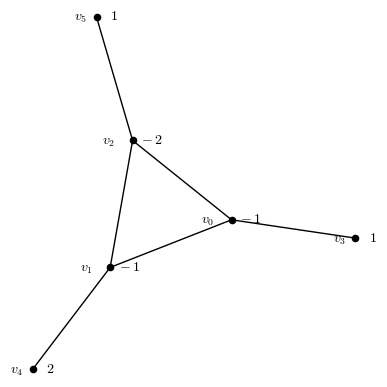

In [51]:
# This one has three high valency vertices
P7 = Plumbing({0: -1, 1: -1, 2: -2, 3: 1, 4: 2, 5: 1}, [(0,1),(0,2),(0,3),(1,4),(2,5),(1,2)]);P7.display()

In [52]:
st = time.time()
zh = P7.zhat(["A",1],P7.spin_c(["A",1])[0],50,n_powers_start = 12, method = "cython") 
end = time.time()
print(end-st)
print(zh)

24.599451065063477
-16 + 16q^(5) - 16q^(15) + 16q^(30) - 16q^(50) + O(q^51)


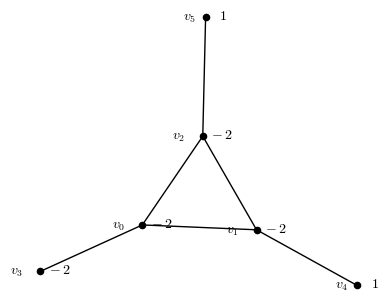

In [53]:
P8 = Plumbing({0: -2, 1: -2, 2: -2, 3: -2, 4: 1, 5: 1}, [(0,1),(0,2),(0,3),(1,4),(2,5),(1,2)]);P8.display()

In [54]:
st = time.time()
zh = P8.zhat(["A",1],P8.spin_c(["A",1])[0],50,n_powers_start = 12, method = "cython") 
end = time.time()
print(end-st)
print(zh)

6.816486597061157
q^(-1/4)(-8 + 8q^(1) - 8q^(3) + 8q^(6) - 8q^(10) + 8q^(15) - 8q^(21) + 8q^(28) - 8q^(36) + 8q^(45) + O(q^55))


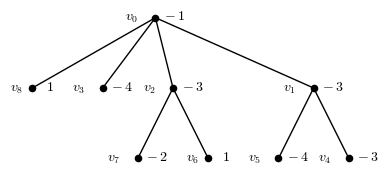

In [54]:
# This one has three high valency vertices
P9 = Plumbing({0: -1, 1: -3, 2: -3, 3: -4, 4: -3, 5: -4, 6: 1, 7: -2,8:1}, [(0,1),(0,2),(0,3),(0,8),(1,4),(1,5),(2,6),(2,7)]);P9.display()

In [66]:
st = time.time()
zh = P9.zhat(["A",1],P9.trivial_spin_c(["A",1]),50,n_powers_start = 5, method = "cython",info = True) 
end = time.time()
print(end-st)
print(zh)

Computing 5
Maximum power computed 132122187995/9834654772
zhat_A: 4*q^(497152659359/9481430884) - 4*q^(373894057867/9481430884) + 4*q^(364412626983/9481430884) - 2*q^(354931196099/9481430884) - 2*q^(312006457343/9619630532) + 2*q^(263908304683/9619630532) + 2*q^(215810152023/9619630532) - 2*q^(196570890959/9619630532) + 2*q^(141956842767/9834654772)
zhat_B: -4*q^(951146769907/9761924580) + 2*q^(873051373267/9761924580) - 2*q^(677812881667/9761924580) - 4*q^(497152659359/9481430884) - 2*q^(411819781403/9481430884) + 2*q^(383375488751/9481430884) + 2*q^(354931196099/9481430884) - 2*q^(335968334331/9481430884) + 2*q^(317005472563/9481430884) + 2*q^(312006457343/9619630532) - 2*q^(292767196279/9619630532) + 2*q^(273527935215/9619630532) - 2*q^(263908304683/9619630532) + 2*q^(244669043619/9619630532) - 2*q^(225429782555/9619630532) - 2*q^(215810152023/9619630532) - 2*q^(196570890959/9619630532) - 2*q^(167711999363/9619630532) + 2*q^(161626152311/9834654772) - 4*q^(141956842767/9834654772)


With Plumbing.zhat_vec we can also compute zhat at higher rank.

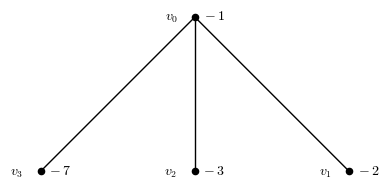

In [8]:
P.display()

In [9]:
for method in ["python","vectorized","cython"]:
    print(method)
    st = time.time()
    zh = P.zhat(["A",2],P.spin_c(["A",2])[0],100,n_powers_start = 1, method = method) 
    end = time.time()
    print(end-st)
    print(zh)

python
5.92275071144104
q^(2)(-12 + 24q^(1) - 24q^(3) - 12q^(4) + 24q^(5) + 24q^(8) - 48q^(9) - 24q^(10) + 48q^(11) - 24q^(13) + O(q^14))
vectorized
1.4732842445373535
q^(2)(-12 + 24q^(1) - 24q^(3) - 12q^(4) + 24q^(5) + 24q^(8) - 48q^(9) - 24q^(10) + 48q^(11) - 24q^(13) + O(q^14))
cython
1.4831657409667969
q^(2)(-12 + 24q^(1) - 24q^(3) - 12q^(4) + 24q^(5) + 24q^(8) - 48q^(9) - 24q^(10) + 48q^(11) - 24q^(13) + O(q^14))


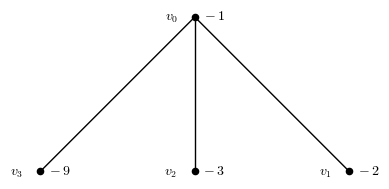

In [10]:
P4.display()

In [11]:
for method in ["python","vectorized","cython"]:
    print(method)
    st = time.time()
    zh = P4.zhat(["A",2],P4.spin_c(["A",2])[0],100,n_powers_start = 3, method = method) 
    end = time.time()
    print(end-st)
    print(zh)

python
4.567965507507324
q^(4)(-12 - 24q^(4) + 48q^(5) - 24q^(12) - 24q^(15) - 12q^(16) + 48q^(17) - 24q^(19) - 12q^(20) + 48q^(29) + O(q^31))
vectorized
1.0178442001342773
q^(4)(-12 - 24q^(4) + 48q^(5) - 24q^(12) - 24q^(15) - 12q^(16) + 48q^(17) - 24q^(19) - 12q^(20) + 48q^(29) + O(q^31))
cython
0.9654583930969238
q^(4)(-12 - 24q^(4) + 48q^(5) - 24q^(12) - 24q^(15) - 12q^(16) + 48q^(17) - 24q^(19) - 12q^(20) + 48q^(29) + O(q^31))


In [16]:
method = "cython"
for spinc in P4.spin_c(["A",2]):
    print(spinc.T)
    st = time.time()
    zh = P4.zhat(["A",2],spinc,100,n_powers_start = 4, method = "cython") 
    end = time.time()
    print(end-st)
    print(zh)

[ 1 -1 -1 -1]
[ 1 -1 -1 -1]
1.652625322341919
q^(4)(-12 - 24q^(4) + 48q^(5) - 24q^(12) - 24q^(15) - 12q^(16) + 48q^(17) - 24q^(19) - 12q^(20) + 48q^(29) + O(q^31))
[ 3 -1 -5 -7]
[ 0 -1  1  2]
1.5264601707458496
q^(86667/20000)(4 + 2q^(1) + 4q^(2) + 4q^(3) - 8q^(4) + 4q^(5) - 4q^(7) - 8q^(8) + 6q^(9) + 4q^(12) + O(q^13))


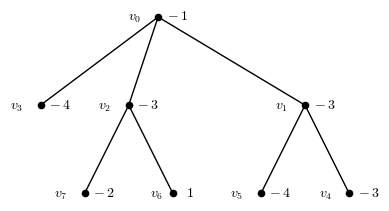

In [55]:
P6.display()

In [ ]:
'